# This code is part of Section 5.3

# Decision Tree Classification

## Import the libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import os
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Fix the Path

In [0]:
os.chdir('D:')
os.getcwd()

## Import the dataset

In [0]:
credit=pd.read_csv('credit.csv',sep=',')

In [0]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null object
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 49.3+ KB


In [0]:
credit['default'].value_counts()

No     517
Yes    183
Name: default, dtype: int64

In [0]:
credit.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

## Split the dataset

In [0]:
X=credit[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]
Y=credit['default']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

## Create Dummy Variables

In [0]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

## Create the Model

In [0]:
mod1=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=4,min_samples_leaf=10)

## Train the Model

In [0]:
mod1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

## Test the Model

In [0]:
Y_pred=mod1.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7523809523809524

## Plot the Tree

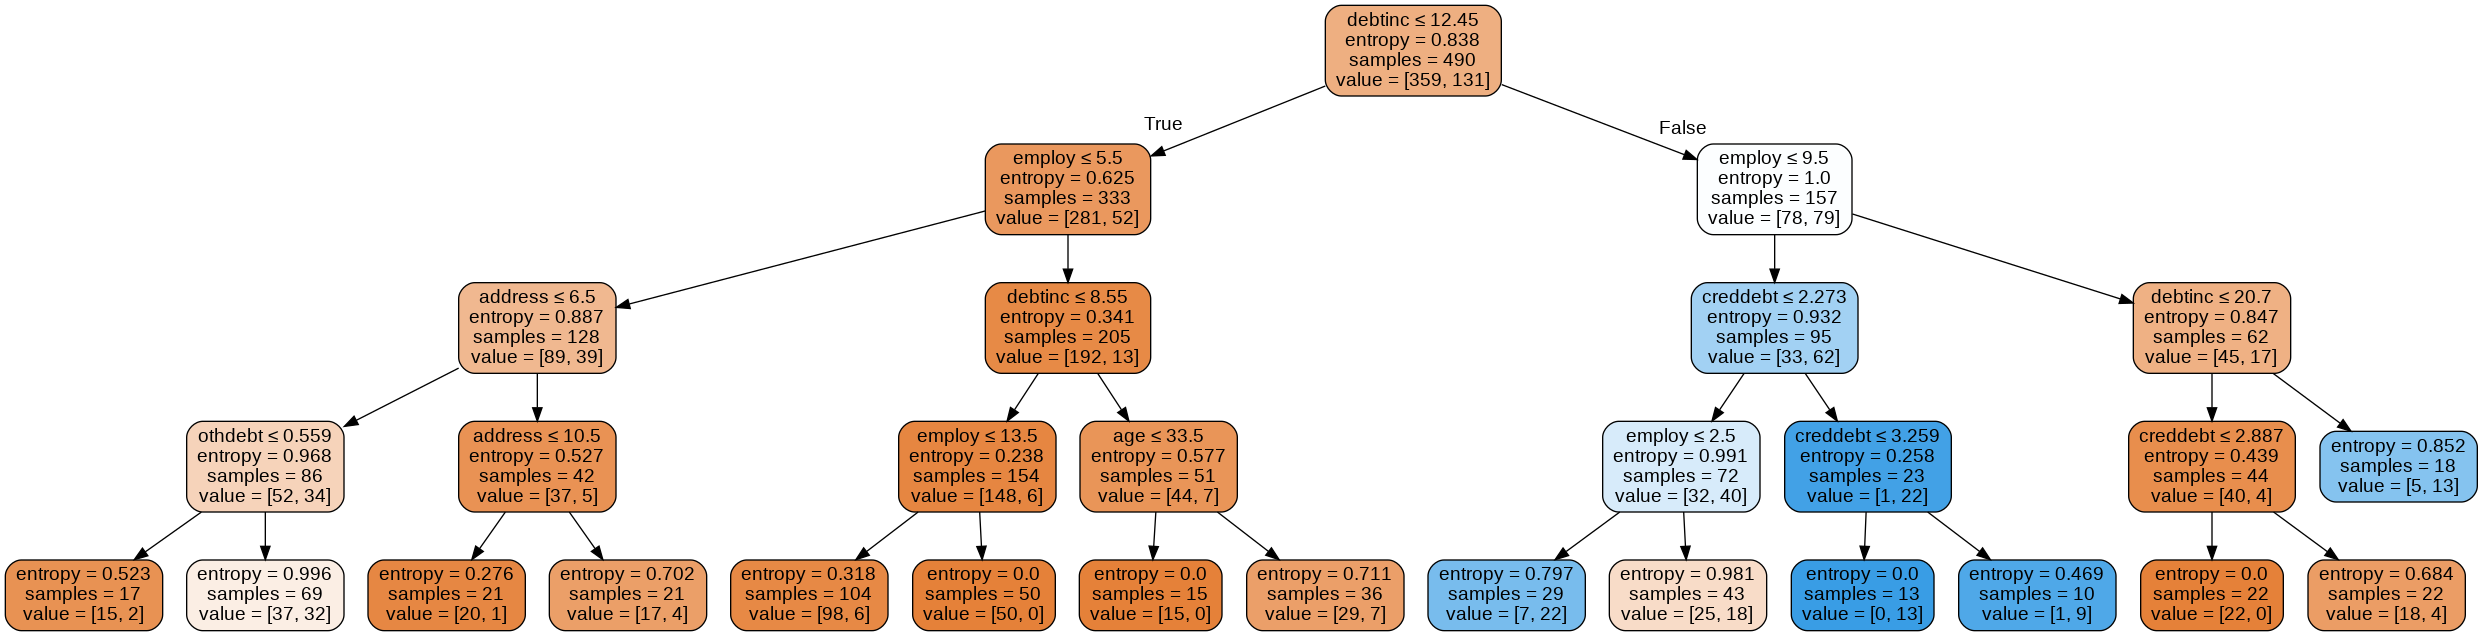

In [0]:
feature_names=list(X_train.columns)
dot_data = StringIO()
export_graphviz(mod1, out_file=dot_data,
                feature_names=feature_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Get and Plot the Feature Importance

In [0]:
print("Feature importances:\n{}".format(mod1.feature_importances_))

Feature importances:
[0.02508255 0.32778496 0.06341027 0.         0.43756197 0.10934599
 0.03681426 0.         0.         0.         0.         0.        ]


In [0]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

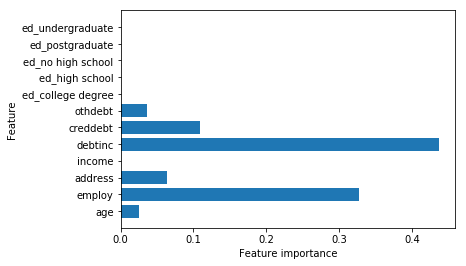

In [0]:
plot_feature_importances(mod1)

# Decision Tree Regression 

## Import and Plot the Data

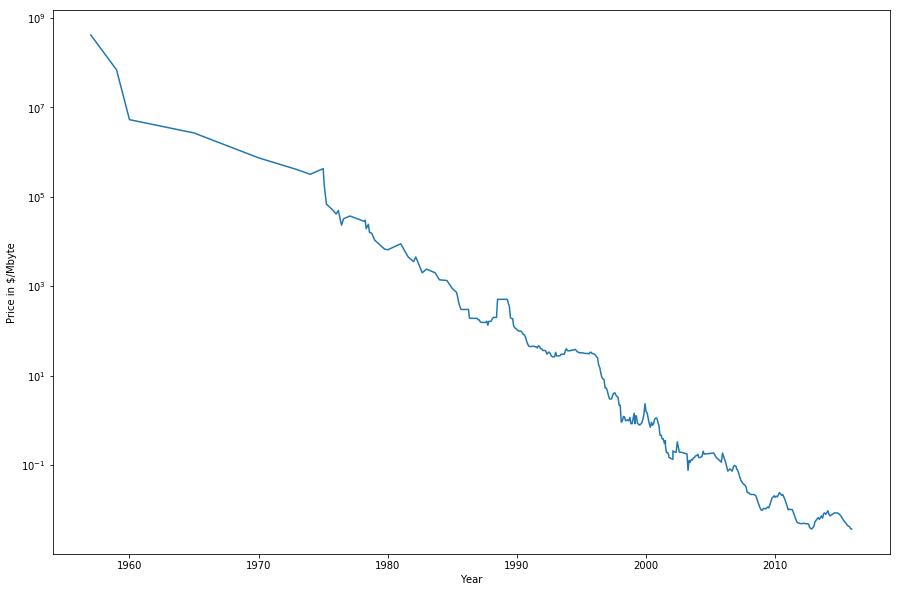

In [0]:
ram_prices = pd.read_csv("ram_price.csv")
plt.figure(figsize=(15,10))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()

## Split the dataset

In [0]:
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

## Train Tree and Linear Regressors

In [0]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

## Test Tree and Linear Regressors

In [0]:
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

## Retransform the input and the output

In [0]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

## Plot both Regressors

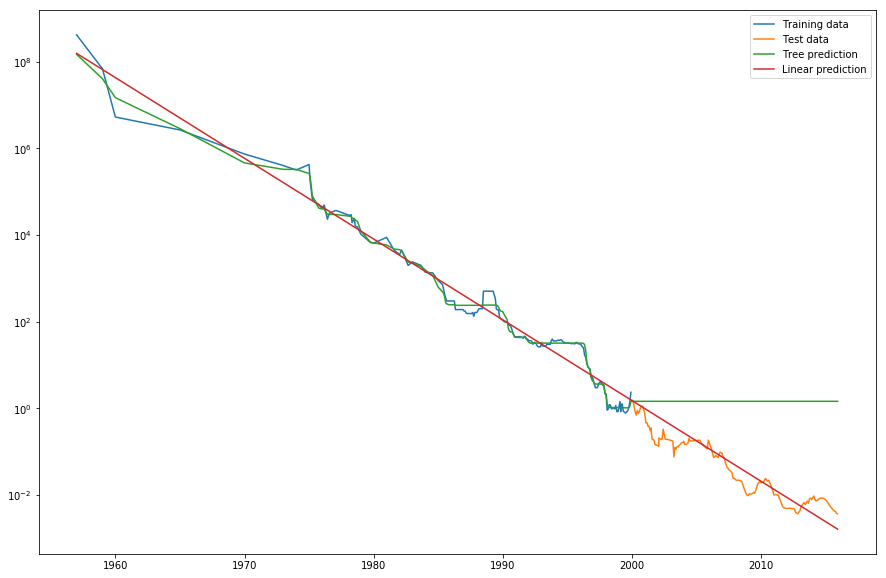

In [0]:
plt.figure(figsize=(15,10))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()